In [43]:
import pandas as pd
ori_data = pd.read_csv("responses.csv")
data = ori_data

In [44]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

In [45]:
%matplotlib inline

In [46]:
data = data.dropna(subset=["Gender"]) #결측값 row자체를 없애기

In [34]:
data = data.drop("Rock n roll", axis = 1)
data = data.drop("Alternative", axis = 1)
data = data.drop("Classical music", axis = 1)
data = data.drop("Reggae, Ska", axis = 1)
data = data.drop("Rock", axis = 1)

data = data.drop("Comedy", axis = 1)

data = data.drop("Religion", axis = 1)
data = data.drop("Fun with friends", axis = 1)
data = data.drop("Musical instruments", axis = 1)
data = data.drop("Law", axis = 1)

In [47]:
var_of_interest = "Gender"
mapping = {var_of_interest: {"female":0, "male":1}}

In [48]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y, ax=ax)
    ax.set_ylabel("Correlation coefficients")

In [49]:
def correlation_plot(var_of_interest, df_main, mapping, figsize=(10, 30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0, 1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        #####
        if corrs.corr_values >
        #####
        do_ploting(corrs.corr_values, corrs['features'], figsize) ########
        return corrs

    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace=True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)

    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype != 'object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)

    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype == 'object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5, 10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

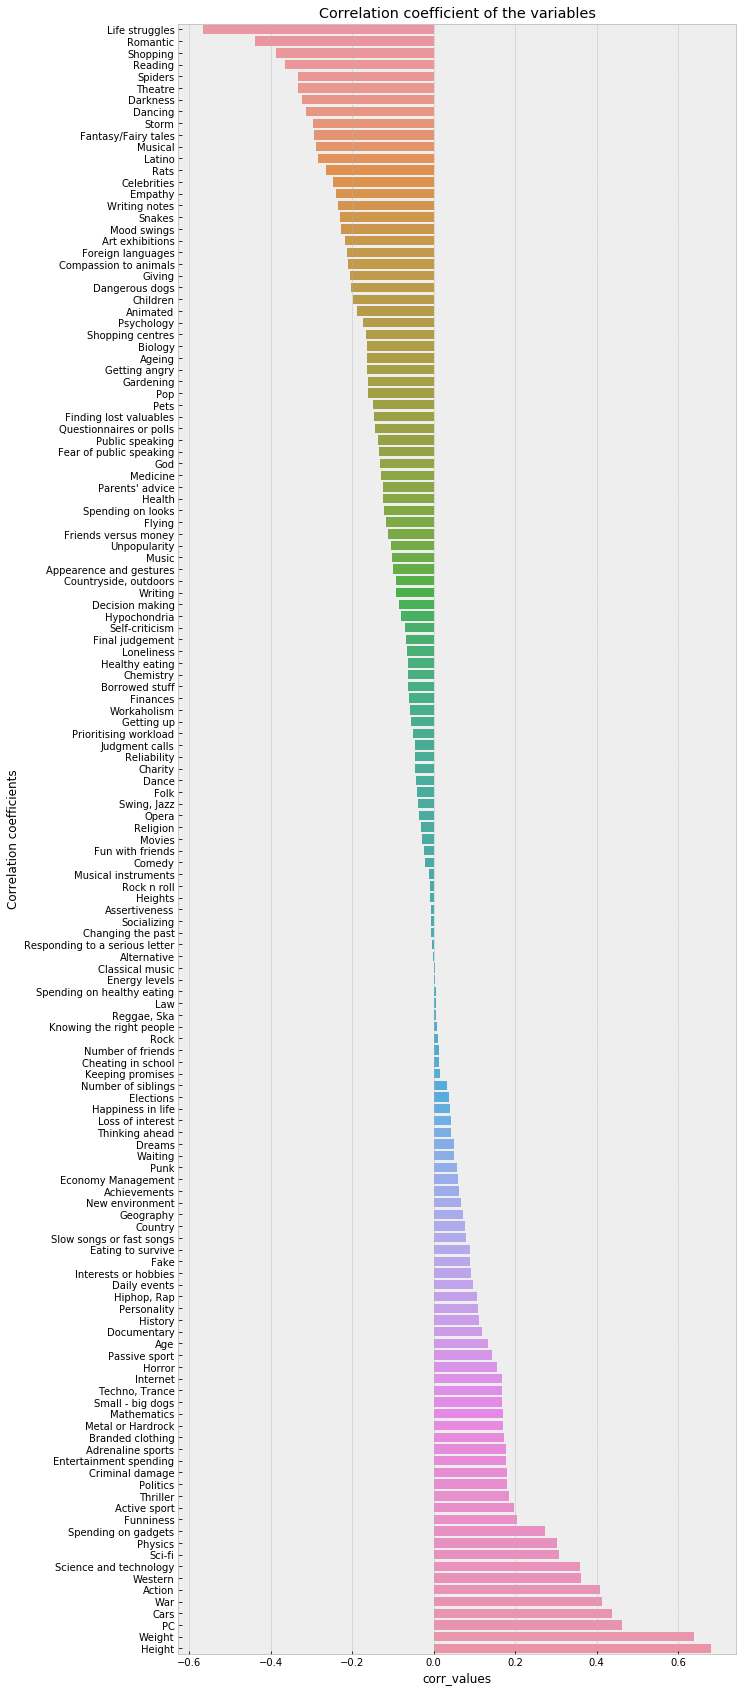

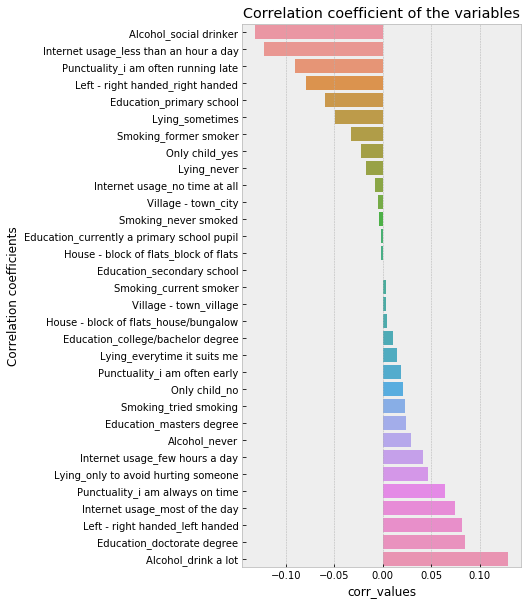

In [50]:
corrs_area = correlation_plot(var_of_interest, data, mapping)